In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,cohen_kappa_score,roc_auc_score,roc_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.feature_selection import SequentialFeatureSelector as sfs,RFE
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[20,10]

In [2]:
data = pd.read_csv('telcom.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [7]:
 for i in data.columns:
    if data[i].dtype == 'object':
        print('COLUMN NAME: ',i)
        print()
        print('NO OF UNIQUE CLASSES: ',data[i].nunique())
        print()
        print(data[i].describe())
        print()

COLUMN NAME:  customerID

NO OF UNIQUE CLASSES:  7043

count           7043
unique          7043
top       7590-VHVEG
freq               1
Name: customerID, dtype: object

COLUMN NAME:  gender

NO OF UNIQUE CLASSES:  2

count     7043
unique       2
top       Male
freq      3555
Name: gender, dtype: object

COLUMN NAME:  Partner

NO OF UNIQUE CLASSES:  2

count     7043
unique       2
top         No
freq      3641
Name: Partner, dtype: object

COLUMN NAME:  Dependents

NO OF UNIQUE CLASSES:  2

count     7043
unique       2
top         No
freq      4933
Name: Dependents, dtype: object

COLUMN NAME:  PhoneService

NO OF UNIQUE CLASSES:  2

count     7043
unique       2
top        Yes
freq      6361
Name: PhoneService, dtype: object

COLUMN NAME:  MultipleLines

NO OF UNIQUE CLASSES:  3

count     7043
unique       3
top         No
freq      3390
Name: MultipleLines, dtype: object

COLUMN NAME:  InternetService

NO OF UNIQUE CLASSES:  3

count            7043
unique              3
top   

In [8]:
# Dropping customerID 

data.drop('customerID',axis=1,inplace=True)

In [9]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
data.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [11]:
# TotalCharges column :

a = [len(i.split()) for i in data['TotalCharges']]
b = [i for i in range(len(a)) if a[i]!=1]

In [12]:
print('Number of enteries with empty strings: ',len(b))

Number of enteries with empty strings:  11


In [13]:
data = data.drop(b,axis=0).reset_index(drop=True)

In [14]:
data['TotalCharges'] = data['TotalCharges'].astype('float')

In [15]:
# Checking for duplicate rows

data.duplicated().sum()

22

In [16]:
data.drop_duplicates(inplace=True)

In [17]:
# Changing data type of SeniorCitizen column

data['SeniorCitizen'] = data['SeniorCitizen'].astype('object')

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7010.0,32.520399,24.520441,1.00,9.0000,29.000,56.0000,72.00
MonthlyCharges,7010.0,64.888666,30.064769,18.25,35.7500,70.400,89.9000,118.75
TotalCharges,7010.0,2290.353388,2266.820832,18.80,408.3125,1403.875,3807.8375,8684.80


In [19]:
y = data['Churn']
x = data.drop('Churn',axis=1)

In [20]:
numerical = x.select_dtypes(include='number')
categorical = x.select_dtypes(include='object')

In [21]:
# 

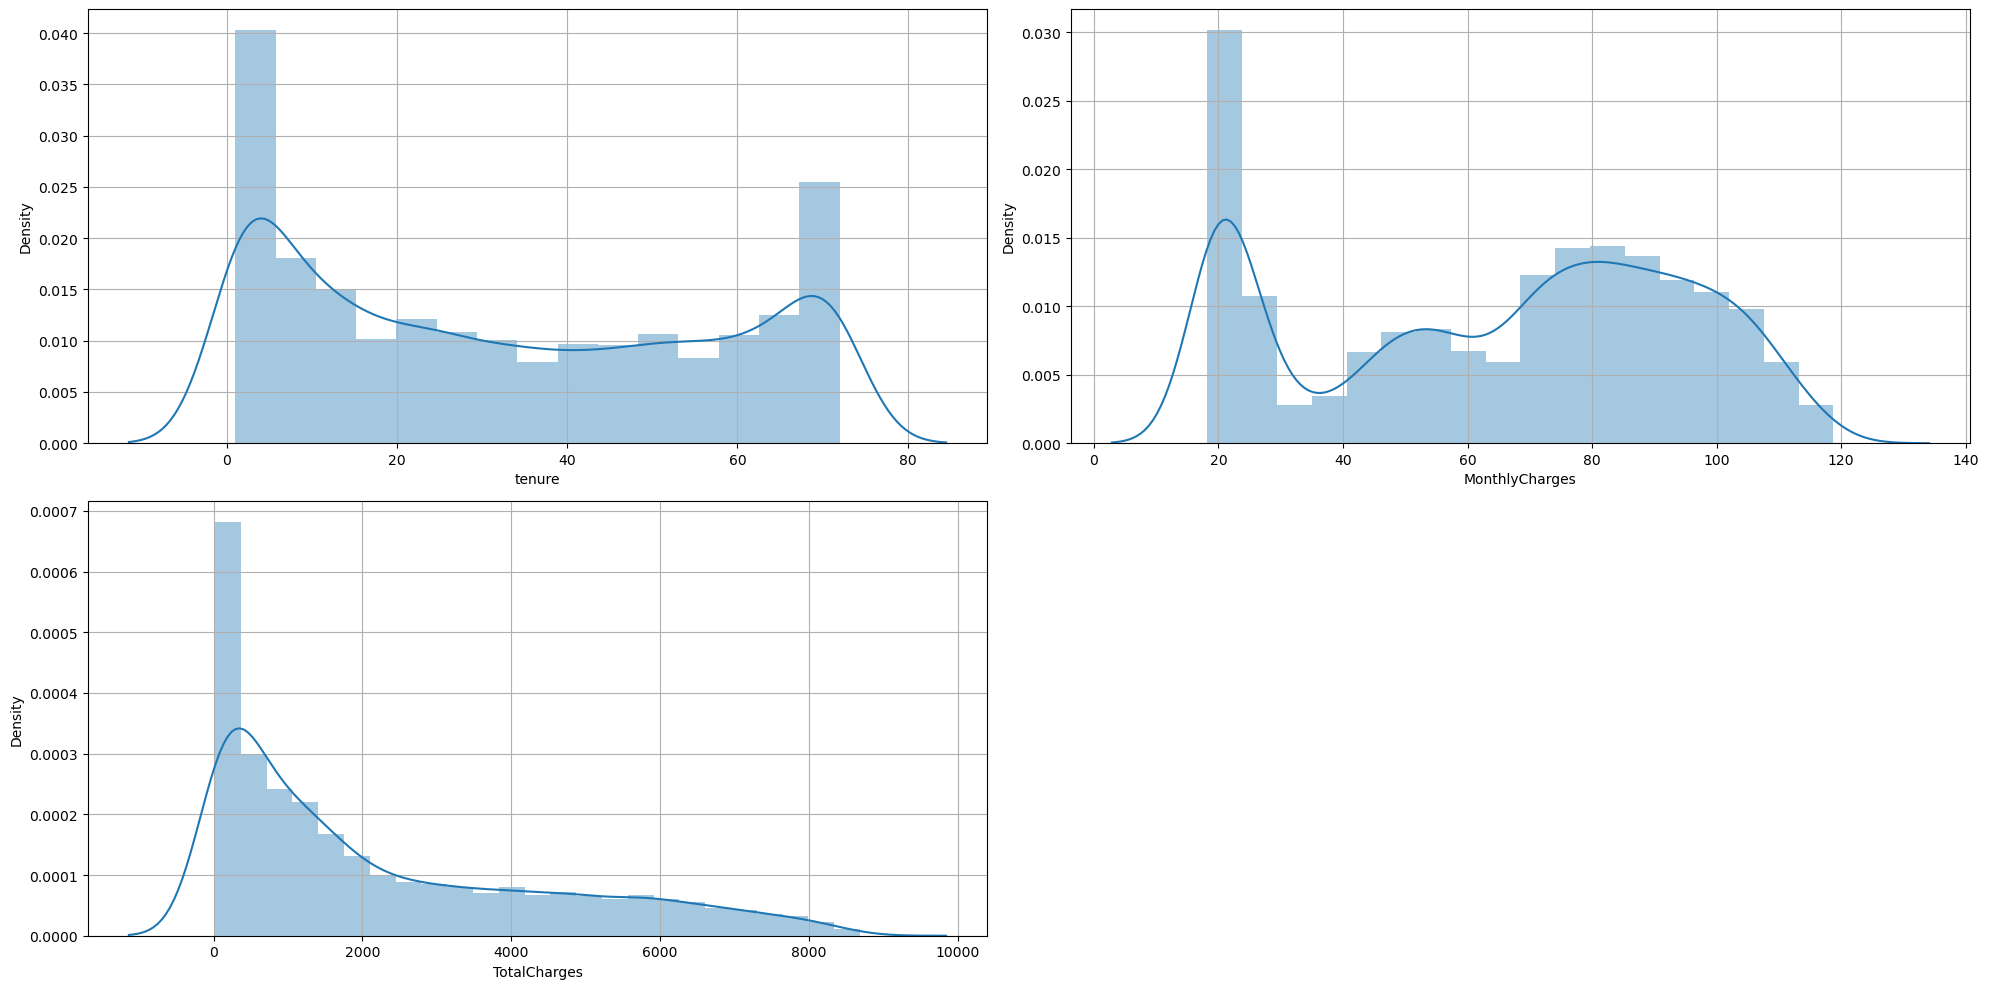

In [22]:
# Numerical columns:

r=2
c=2
iterator = 1
for i in numerical.columns:
    plt.subplot(r,c,iterator)
    sns.distplot(numerical[i])
    plt.grid()
    iterator+=1
plt.tight_layout()    
plt.show()

# Variables are not normally distributed.
# Totalcharges variable is rightly skewed.

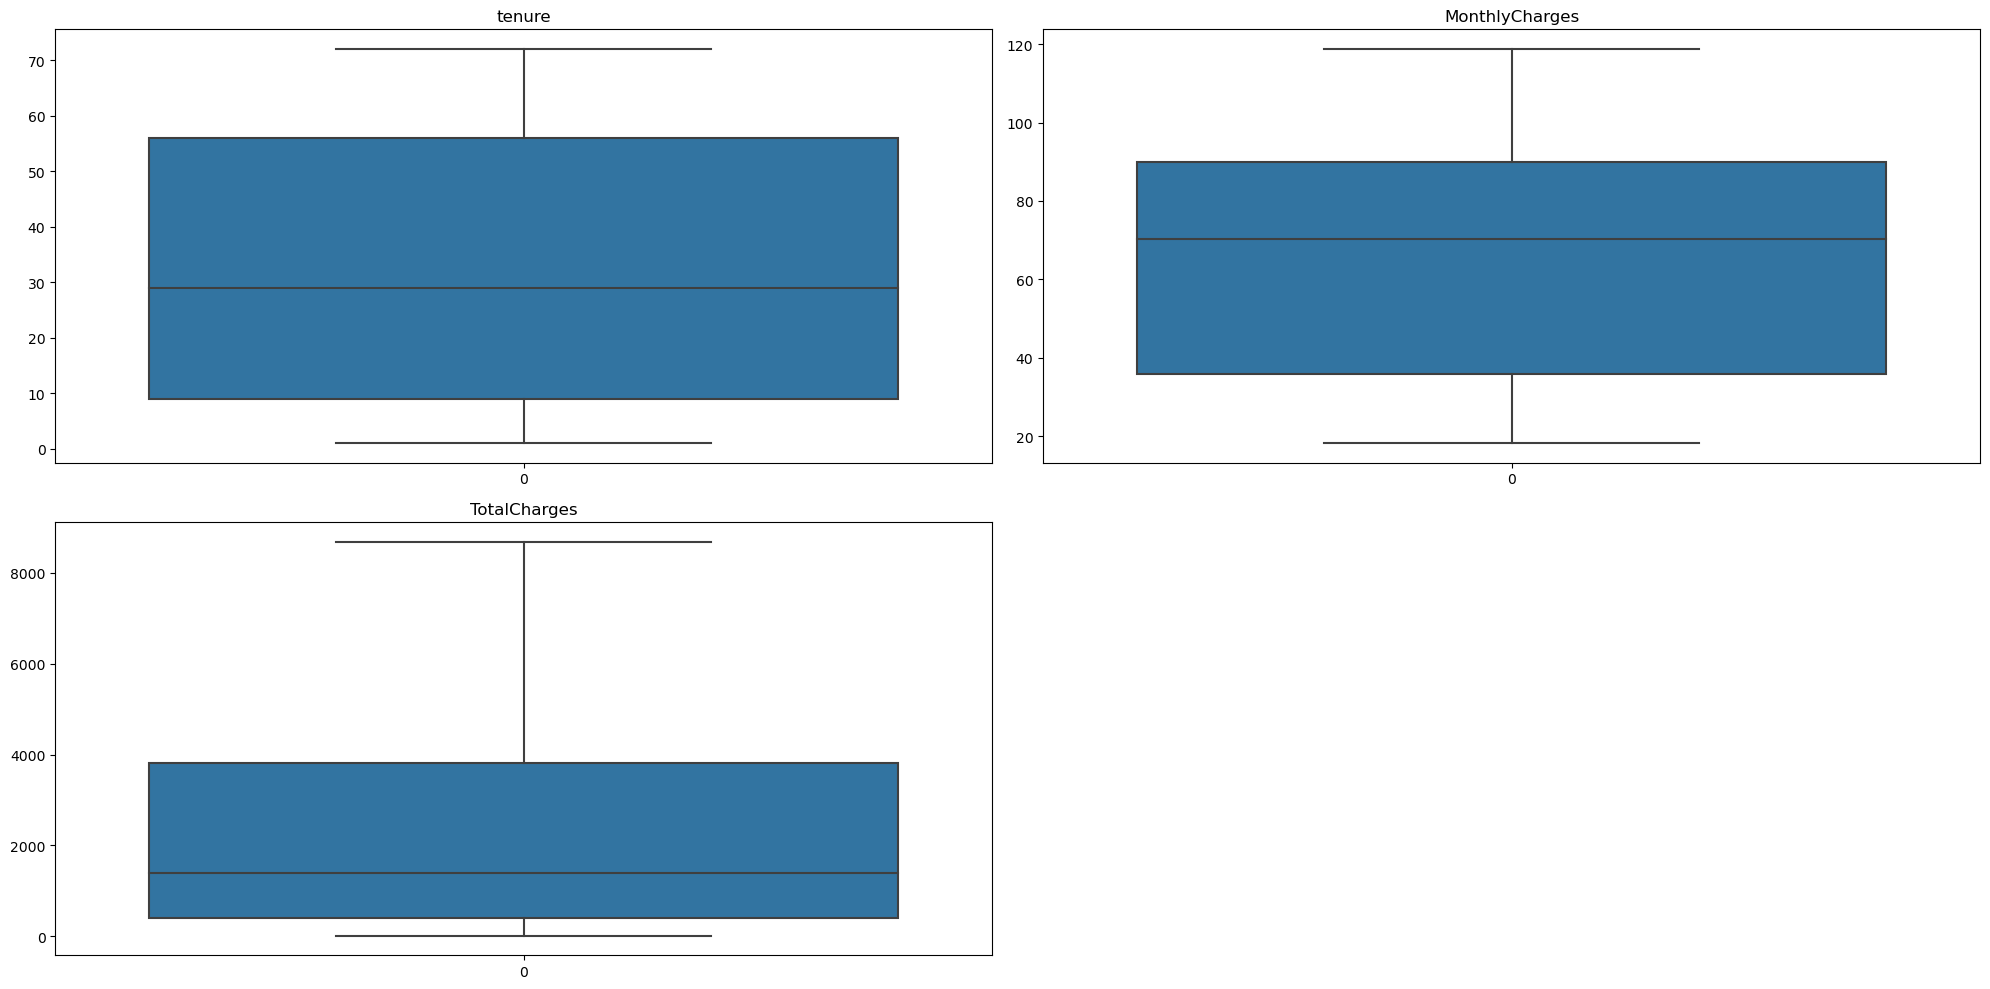

In [23]:
r=2
c=2
iterator = 1
for i in numerical.columns:
    plt.subplot(r,c,iterator)
    sns.boxplot(numerical[i])
    plt.title(i)
    iterator+=1
plt.tight_layout()    
plt.show()

# There is no outlier present in dataset.

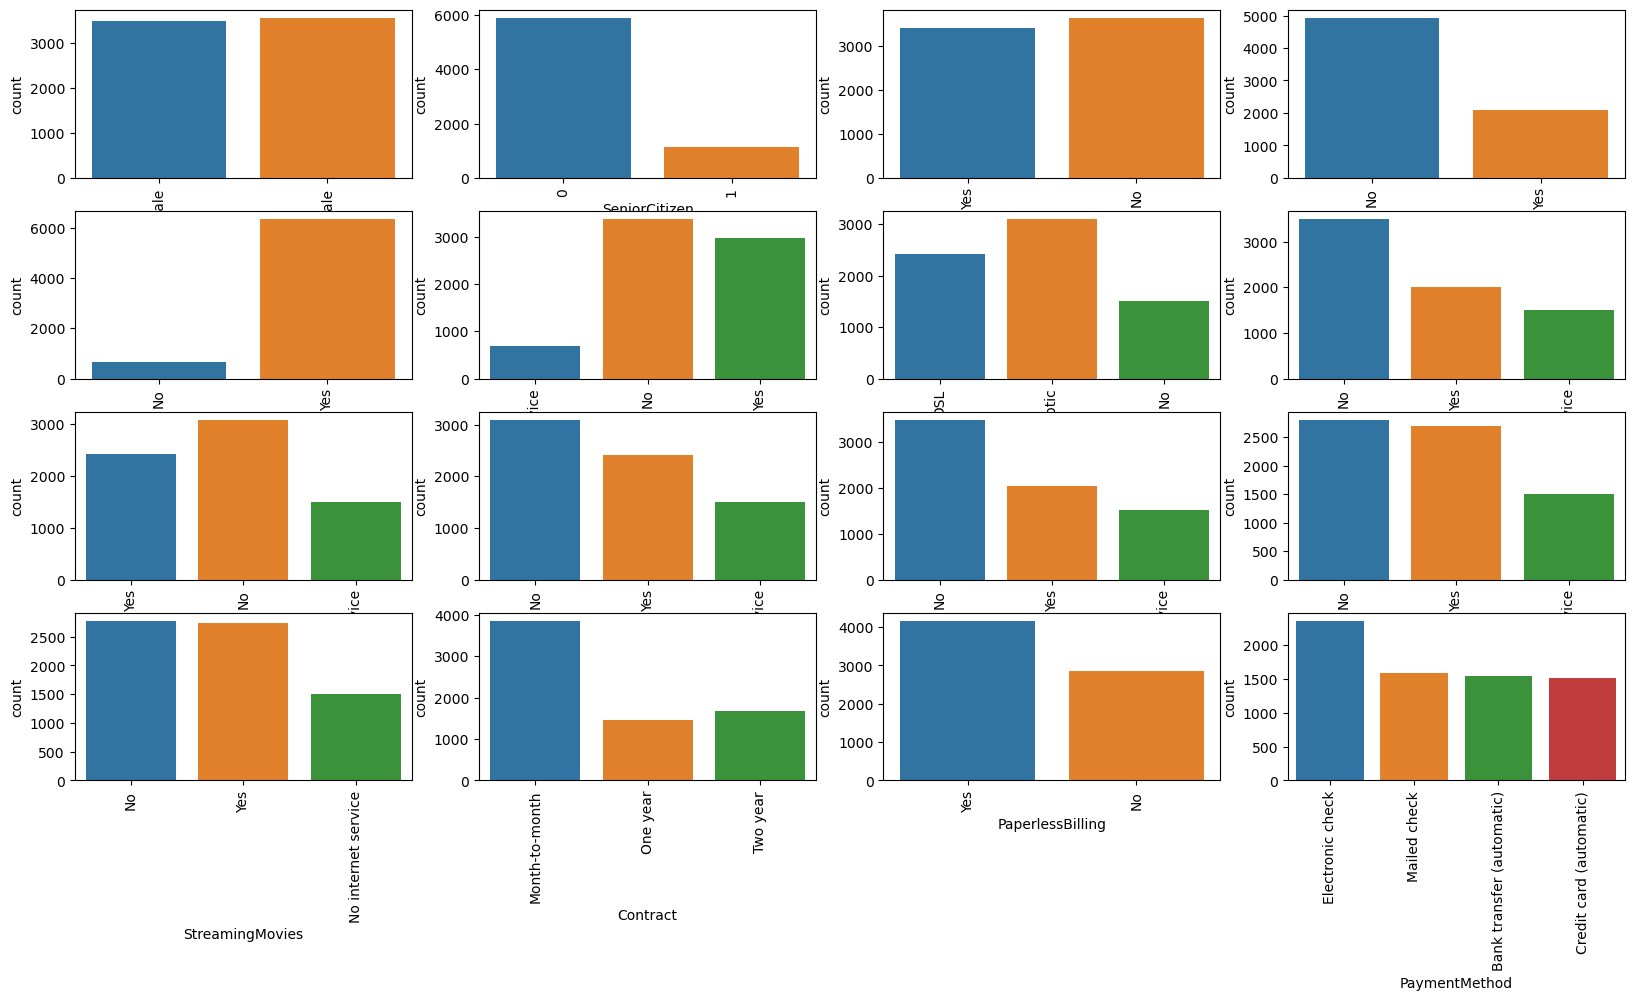

In [24]:
# Categorical Columns:

r=4
c=4
iterator = 1
for i in categorical.columns:
    plt.subplot(r,c,iterator)
    sns.countplot(x = categorical[i], data = categorical)
    plt.xticks(rotation=90)
    iterator+=1   
plt.show()

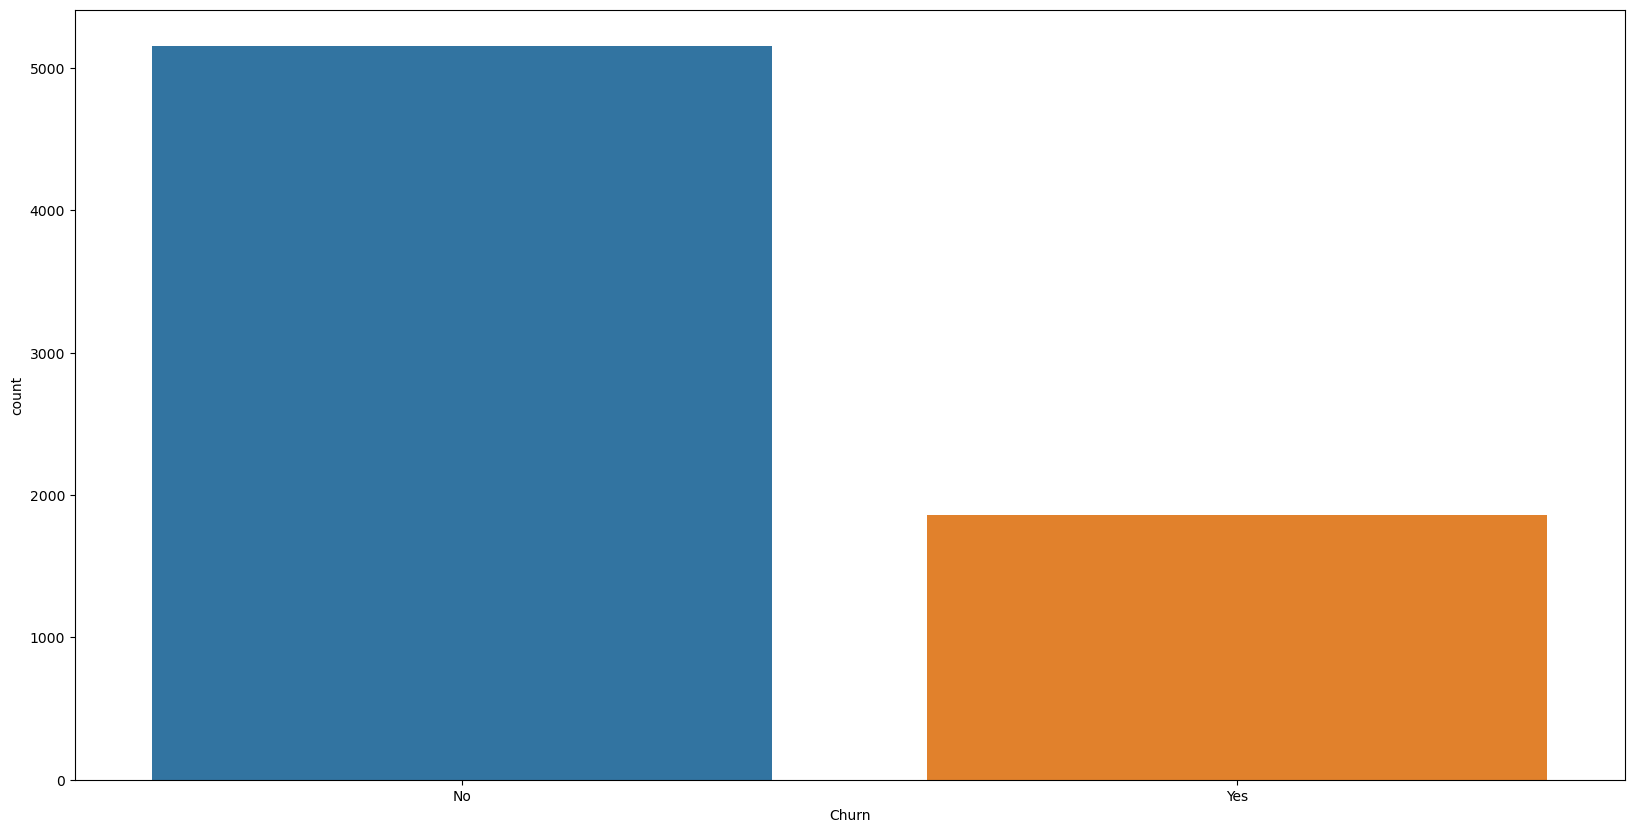

In [25]:
# Checking target variable for imbalance

sns.countplot(x=y)
plt.show()

In [67]:
y.value_counts()

# We observe that target variable values are moderately imbalanced.

0    5153
1    1857
Name: Churn, dtype: int64

In [27]:
# Statistical test for insignificant variables.

## Numerical variables :

In [28]:
numerical.head(2)

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50


In [29]:
# Performing jarque bera test to check data normality

The null and alternative hypothesis for jarque_bera is given as:
<p style='text-indent:20em'> <strong> $H_{0}$: The data is normally distributed. </strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: The data is not normally distributed. </strong></p>

Assuming the level of confidence as 95%

In [30]:
from scipy.stats import jarque_bera

In [31]:
def jarq(yes,no):
    tstat_y,pval_y = jarque_bera(yes)
    tstat_n,pval_n = jarque_bera(no)
    if pval_y>0.05 and pval_n>0.05:
        print('Since the pvalue of both churners and non churners is more than 0.05, we dont have enough evidence \
        to reject null hyphothesis')
        print('Both are normally distributed')
    elif pval_y<0.05 and pval_n<0.05:
        print('Since the pvalue of both churners and non churners is less than 0.05, we reject the null hyphothesis')
        print('Both are not normally distirbuted')
    elif pval_y<0.05 or pval_n<0.05:
        print('Either one of churner or non churner is less than 0.05, so we reject the null hyphothesis')
        print('Either one of them is not normally distributed')

In [32]:
for i in numerical.columns:
    print(f'Checking normality of two seperate sets of {i} based on target')
    print()
    yes = data[data['Churn']=='Yes'][i]
    no = data[data['Churn']=='No'][i]
    jarq(yes,no)

Checking normality of two seperate sets of tenure based on target

Since the pvalue of both churners and non churners is less than 0.05, we reject the null hyphothesis
Both are not normally distirbuted
Checking normality of two seperate sets of MonthlyCharges based on target

Since the pvalue of both churners and non churners is less than 0.05, we reject the null hyphothesis
Both are not normally distirbuted
Checking normality of two seperate sets of TotalCharges based on target

Since the pvalue of both churners and non churners is less than 0.05, we reject the null hyphothesis
Both are not normally distirbuted


In [33]:
# Inference :

# MonthlyCharges and TotalCharges are not normally distributed. So we will perform Kruskal wallis test to check there 
# Dependency on target

# Tenure is normally distributed. So we will perform anova test to check its dependency on target variable.

In [34]:
# Performing independence two sample ttest on tenure :


The null and alternative hypothesis for `indepenent two sample ttest` is given as:
<p style='text-indent:20em'> <strong> $H_{0}$: The data samples are with equal mean (independent). </strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: The data samples do not have equal meand(i.e. variables are dependent). </strong></p>

Assuming the level of confidence as 95%

In [35]:
ten_yes = data[data['Churn']=='Yes']['tenure']
ten_no = data[data['Churn']=='No']['tenure']
stats.ttest_ind(ten_yes,ten_no)

Ttest_indResult(statistic=-31.618906226127788, pvalue=3.0931274273843194e-205)

In [36]:
# Since pvalue is less than 0.05, we reject null hyphothesis. 
# We can say that variable is contributing to target variable.

In [37]:
# Performing kruskal wallis test on MonthlyCharges and TotalCharges :

The null and alternative hypothesis for `kruskal wallis test` is given as:
<p style='text-indent:20em'> <strong> $H_{0}$: The data samples are with equal median (independent). </strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: The data samples do not have equal median(i.e. variables are dependent). </strong></p>

Assuming the level of confidence as 95%

In [38]:
# MonthlyCharges :
mon_yes = data[data['Churn']=='Yes']['MonthlyCharges']
mon_no = data[data['Churn']=='No']['MonthlyCharges']

In [39]:
from scipy.stats import kruskal

In [40]:
kruskal(mon_yes,mon_no)

KruskalResult(statistic=240.6747374484256, pvalue=2.8027443650162474e-54)

In [41]:
# Since pvalue is less than 0.05, we reject null hyphothesis. 
# We can say that variable is contributing to target variable.

In [42]:
# TotalCharges :
total_yes = data[data['Churn']=='Yes']['TotalCharges']
total_no = data[data['Churn']=='No']['TotalCharges']

In [43]:
kruskal(total_yes,total_no)

KruskalResult(statistic=373.22079793393135, pvalue=3.723356835989822e-83)

In [44]:
# Since pvalue is less than 0.05, we reject null hyphothesis. 
# We can say that variable is contributing to target variable.

## Categorical variable :

In [45]:
categorical.head(2)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check


In [46]:
# Chi-Squre test for independence :
from scipy.stats import chi2_contingency

This test is used to test whether the categorical variables are independent or not.

<p style='text-indent:20em'> <strong> $H_{0}$: The variables are independent</strong></p>
<p style='text-indent:20em'> <strong> $H_{1}$: The variables are not independent (i.e. variables are dependent)</strong></p>

In [47]:
for i in categorical.columns:
    print(f'For : {i}')
    print()
    print(f'H0: The {i} and target are independent')
    print(f'H1: The {i} and target are not independent')
    table = pd.crosstab(categorical[i],y)
    observed_val = table.values
    test_value,p,dof,expected = chi2_contingency(observed=observed_val,correction=False)
    
    if p>0.05:
        print('Since the pvalue is more than 0.05, we fail to reject null hyphothesis.')
        print(f'{i} and target are independent')
    else:
        print('Since the pvalue is less than 0.05, we reject the null hyphothesis')
        print(f'{i} and target are dependent')

For : gender

H0: The gender and target are independent
H1: The gender and target are not independent
Since the pvalue is more than 0.05, we fail to reject null hyphothesis.
gender and target are independent
For : SeniorCitizen

H0: The SeniorCitizen and target are independent
H1: The SeniorCitizen and target are not independent
Since the pvalue is less than 0.05, we reject the null hyphothesis
SeniorCitizen and target are dependent
For : Partner

H0: The Partner and target are independent
H1: The Partner and target are not independent
Since the pvalue is less than 0.05, we reject the null hyphothesis
Partner and target are dependent
For : Dependents

H0: The Dependents and target are independent
H1: The Dependents and target are not independent
Since the pvalue is less than 0.05, we reject the null hyphothesis
Dependents and target are dependent
For : PhoneService

H0: The PhoneService and target are independent
H1: The PhoneService and target are not independent
Since the pvalue is m

In [48]:
# Variable that are independent from target variable
print('Variable that are independent from target variable: ')
print()
for i in categorical.columns:
    table = pd.crosstab(categorical[i],y)
    observed_val = table.values
    test_value,p,dof,expected = chi2_contingency(observed=observed_val,correction=False)

    if p>0.05:
        print(i)

Variable that are independent from target variable: 

gender
PhoneService


In [49]:
# Variable that are dependent on target variable
print('Variable that are dependent on target variable: ')
print()
for i in categorical.columns:
    table = pd.crosstab(categorical[i],y)
    observed_val = table.values
    test_value,p,dof,expected = chi2_contingency(observed=observed_val,correction=False)
    
    if p<0.05:
        print(i)

Variable that are dependent on target variable: 

SeniorCitizen
Partner
Dependents
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod


## Scaling :

In [50]:
ss = StandardScaler()
num = numerical.columns
for i in num:
    data[i] = ss.fit_transform(data[num])

In [51]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,-1.285566,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,-1.165523,-1.285566,No
1,Male,0,No,No,0.060346,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,-0.264071,0.060346,No
2,Male,0,No,No,-1.244781,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.367189,-1.244781,Yes
3,Male,0,No,No,0.508983,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.751387,0.508983,No
4,Female,0,No,No,-1.244781,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.193308,-1.244781,Yes


## Checking multicollinearity between numerical columns

In [52]:
num_multi = data.select_dtypes(include=np.number)

In [53]:
vif = pd.DataFrame()

vif['Feature'] = num_multi.columns
vif['vif factor'] = [VIF(num_multi.values,i) for i in range(num_multi.shape[1])]

vif.sort_values('vif factor',ascending=False).reset_index(drop=True)

,Feature,vif factor
0,tenure,inf
1,TotalCharges,inf
2,MonthlyCharges,1.063412


In [54]:
num_multi.drop('tenure',axis=1,inplace=True)

In [55]:
vif = pd.DataFrame()

vif['Feature'] = num_multi.columns
vif['vif factor'] = [VIF(num_multi.values,i) for i in range(num_multi.shape[1])]

vif.sort_values('vif factor',ascending=False).reset_index(drop=True)

,Feature,vif factor
0,TotalCharges,1.063412
1,MonthlyCharges,1.063412


In [56]:
# Dropping tenure variable as it has high multicollinearity
data.drop('tenure',axis=1,inplace=True)

## Encoding :

In [57]:
for i in categorical.columns:
    print(f'Number of unique values in {i}:',categorical[i].nunique())

Number of unique values in gender: 2
Number of unique values in SeniorCitizen: 2
Number of unique values in Partner: 2
Number of unique values in Dependents: 2
Number of unique values in PhoneService: 2
Number of unique values in MultipleLines: 3
Number of unique values in InternetService: 3
Number of unique values in OnlineSecurity: 3
Number of unique values in OnlineBackup: 3
Number of unique values in DeviceProtection: 3
Number of unique values in TechSupport: 3
Number of unique values in StreamingTV: 3
Number of unique values in StreamingMovies: 3
Number of unique values in Contract: 3
Number of unique values in PaperlessBilling: 2
Number of unique values in PaymentMethod: 4


In [58]:
n_data = data.drop('Churn',axis=1)

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le = LabelEncoder()
cat = categorical.columns
for i in cat:
    n_data[i] = le.fit_transform(n_data[i])

In [61]:
n_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,-1.165523,-1.285566
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,-0.264071,0.060346
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,-0.367189,-1.244781
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,-0.751387,0.508983
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,0.193308,-1.244781


In [62]:
y = y.replace({'Yes':1,'No':0})

In [63]:
y_df = y.to_frame()

In [64]:
df_final = pd.concat([n_data,y_df],axis=1)

In [65]:
df_final.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,-1.165523,-1.285566,0
1,1,0,0,0,1,0,0,2,0,2,0,0,0,1,0,3,-0.264071,0.060346,0
2,1,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,-0.367189,-1.244781,1
3,1,0,0,0,0,1,0,2,0,2,2,0,0,1,0,0,-0.751387,0.508983,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,0.193308,-1.244781,1


In [66]:
df_final.to_csv('data1.csv',sep=',')